In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df["price"].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

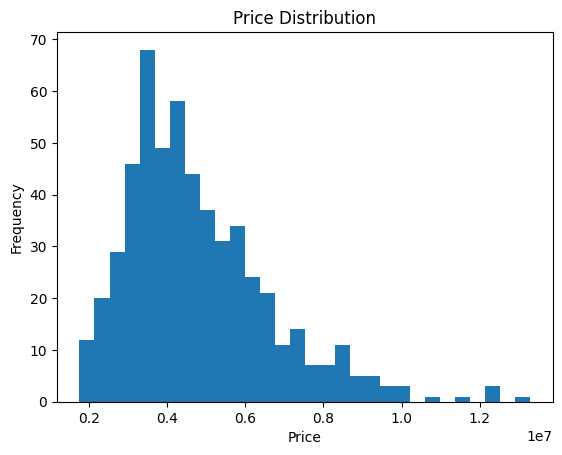

In [6]:
plt.figure()
plt.hist(df["price"], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [8]:
df["price"].skew()

1.2122388370279802

In [9]:
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()
corr


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


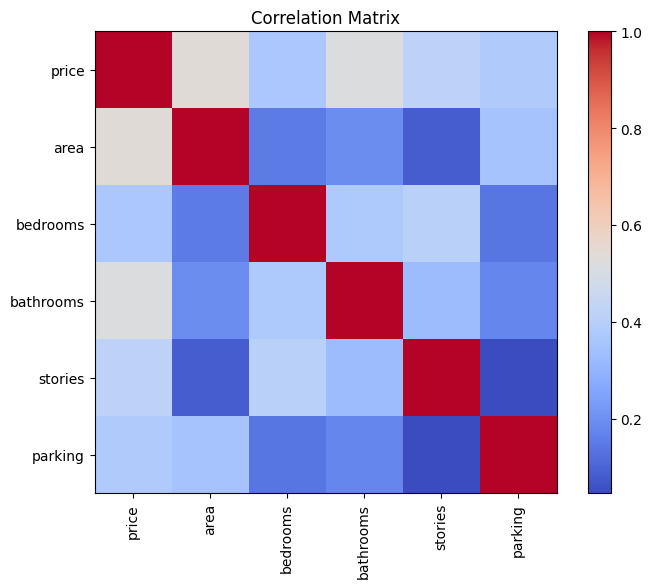

In [10]:
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


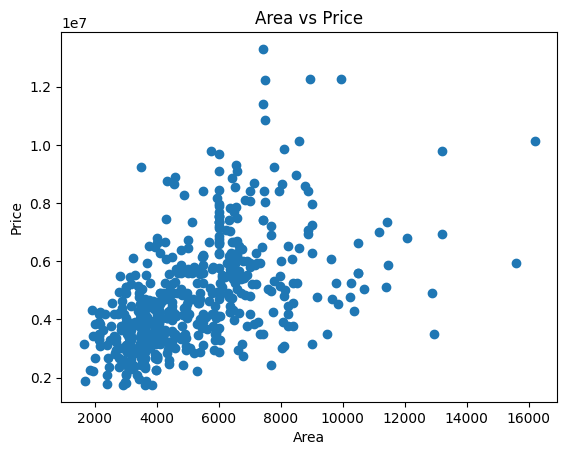

In [11]:
plt.figure()
plt.scatter(df["area"], df["price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()


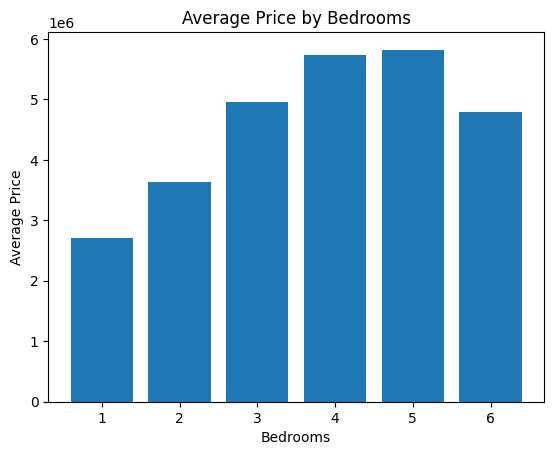

In [12]:
bed_avg = df.groupby("bedrooms")["price"].mean()

plt.figure()
plt.bar(bed_avg.index, bed_avg.values)
plt.xlabel("Bedrooms")
plt.ylabel("Average Price")
plt.title("Average Price by Bedrooms")
plt.show()


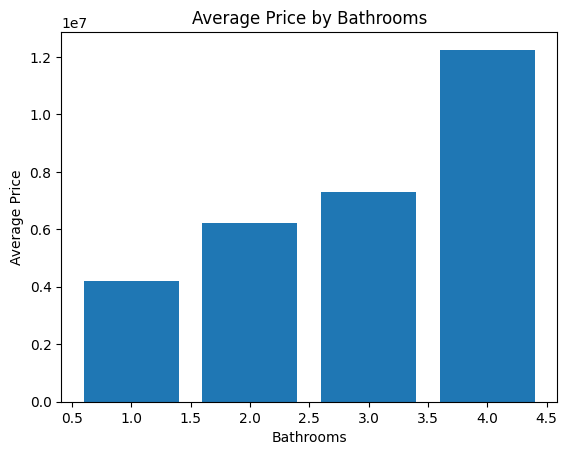

In [13]:
bath_avg = df.groupby("bathrooms")["price"].mean()

plt.figure()
plt.bar(bath_avg.index, bath_avg.values)
plt.xlabel("Bathrooms")
plt.ylabel("Average Price")
plt.title("Average Price by Bathrooms")
plt.show()


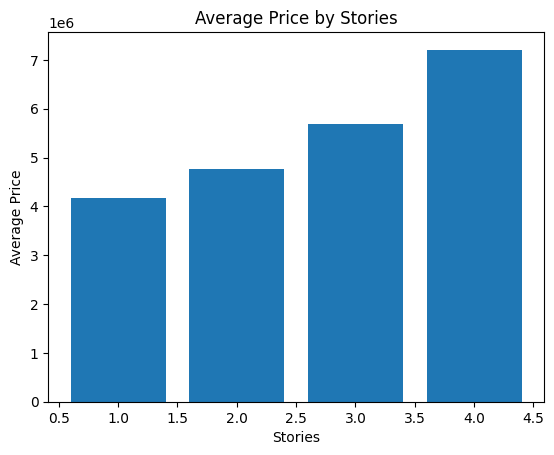

In [14]:
story_avg = df.groupby("stories")["price"].mean()

plt.figure()
plt.bar(story_avg.index, story_avg.values)
plt.xlabel("Stories")
plt.ylabel("Average Price")
plt.title("Average Price by Stories")
plt.show()


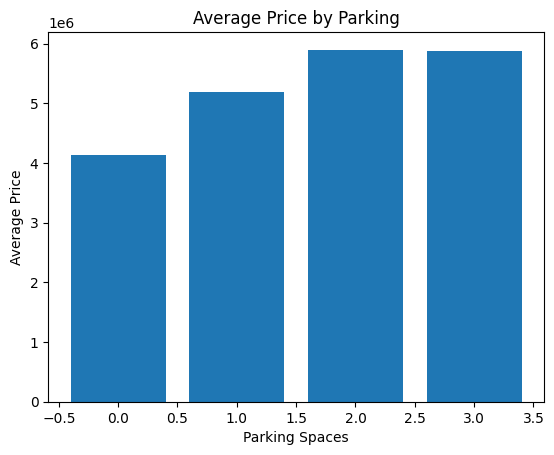

In [15]:
park_avg = df.groupby("parking")["price"].mean()

plt.figure()
plt.bar(park_avg.index, park_avg.values)
plt.xlabel("Parking Spaces")
plt.ylabel("Average Price")
plt.title("Average Price by Parking")
plt.show()

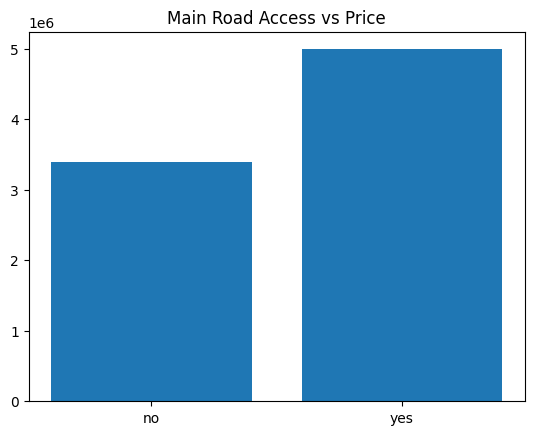

In [16]:
mainroad_avg = df.groupby("mainroad")["price"].mean()

plt.figure()
plt.bar(mainroad_avg.index, mainroad_avg.values)
plt.title("Main Road Access vs Price")
plt.show()

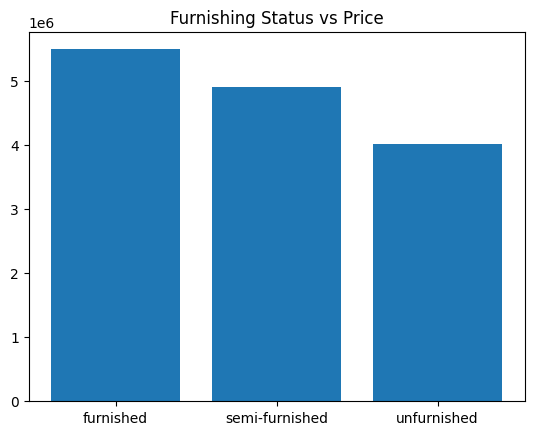

In [17]:
furnish_avg = df.groupby("furnishingstatus")["price"].mean()

plt.figure()
plt.bar(furnish_avg.index, furnish_avg.values)
plt.title("Furnishing Status vs Price")
plt.show()